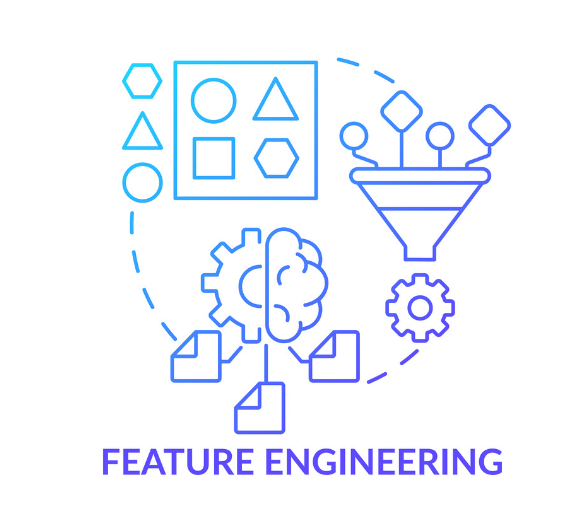

## Предобработка и Feature Engineering

Общий пайплайн обработки данных

- Удаление бесполезных переменных
  - Константные признаки
  - Переменные, у которых количество наблюдений = количеству строк в датасете
  - Переменные, связанные с целевой )в смысле потенциальной утечки)
  - Переменные с юридическим риском
  - …
- Преобразование типов данных (если нужно)
- Нормализация строк (если нужно)
- Обработка редких категорий (укрупнение по иерархии)
- Импутация пропусков (например, константой)
- **Разбиение на train/test**
- Преобразования, меняющие распределение
- Обработка выбросов
- Импутация пропусков (с помощью статистик и других вычислений по данным)
- Feature Engineering
- Масштабирование
____


**Feature Engineering** - конструирование признаков - процесс, во время которого мы извлекаем новые переменные для таблицы из необработанных данных.

[Feature Engineering and Selection: A Practical Approach for Predictive Models](http://www.feat.engineering/index.html)

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)

[IMDB Movies Dataset](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows


In [ ]:
!ls /kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows

imdb_top_1000.csv


In [ ]:
data = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
data.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [ ]:
data.describe(include='all')

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000,899,1000,1000,1000.000000,1000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,831
unique,1000,999,100,16,140,202,NaN,1000,NaN,548,660,841,891,939,NaN,823
top,https://m.media-amazon.com/images/M/MV5BMTY5OD...,Drishyam,2014,U,100 min,Drama,NaN,A man in London tries to help a counter-espion...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,1,2,32,234,23,85,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.949300,NaN,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.275491,NaN,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
data['cast'] = data[['Star1', 'Star2', 'Star3', 'Star4']].agg(' '.join, axis=1)
data['all_text'] = data['Series_Title'] + ' ' + data['Overview'] + ' ' + data['cast']
data['Runtime'] = data['Runtime'].map(lambda x: x.split()[0]).astype(int)
data['Gross'] = data['Gross'].str.replace(',', '').astype(float)
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data = pd.concat([data.drop(columns=['Genre']), data['Genre'].str.replace(' ', '').str.get_dummies(sep=",")], axis=1)
data = data.drop(columns=['Poster_Link', 'Series_Title', 'Overview', 'Star1', 'Star2', 'Star3', 'Star4'])
data.head(2)

,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,cast,all_text,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1994.0,A,142,9.3,80.0,Frank Darabont,2343110,28341469.0,Tim Robbins Morgan Freeman Bob Gunton William ...,The Shawshank Redemption Two imprisoned men bo...,...,0,0,0,0,0,0,0,0,0,0
1,1972.0,A,175,9.2,100.0,Francis Ford Coppola,1620367,134966411.0,Marlon Brando Al Pacino James Caan Diane Keaton,The Godfather An organized crime dynasty's agi...,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.isna().sum()

,0
Released_Year,1
Certificate,101
Runtime,0
IMDB_Rating,0
Meta_score,157
Director,0
No_of_Votes,0
Gross,169
cast,0
all_text,0


In [ ]:
from sklearn.model_selection import train_test_split

<Axes: ylabel='Frequency'>

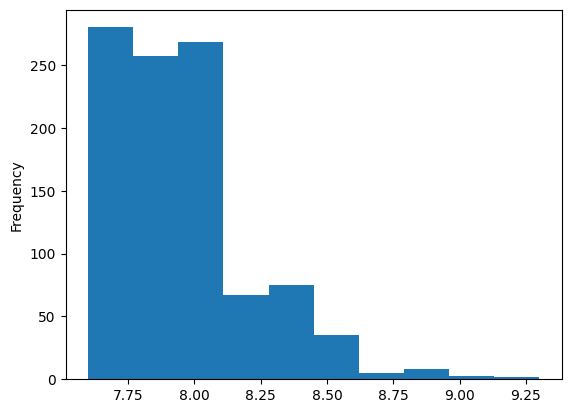

In [ ]:
data['IMDB_Rating'].plot.hist()

In [ ]:
X, y = data.drop(columns='IMDB_Rating'), data['IMDB_Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=77)

#### Стратификация

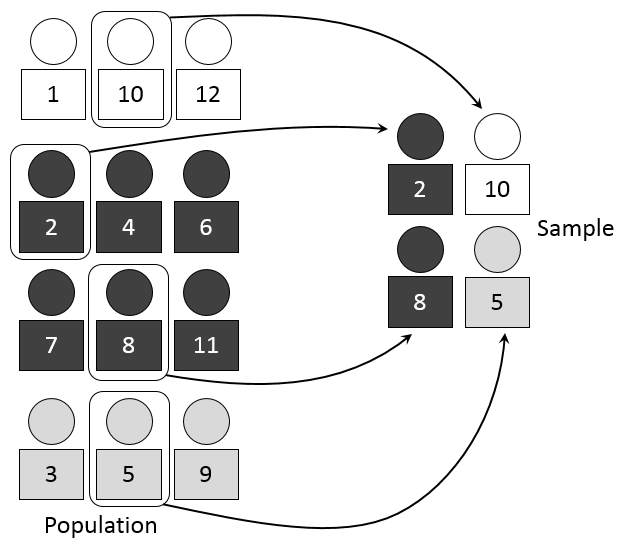

In [ ]:
qs = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
pd.concat([y_train.describe(qs), y_test.describe(qs)], axis=1)

,IMDB_Rating,IMDB_Rating
count,750.000000,250.000000
mean,7.946000,7.959200
std,0.280003,0.261781
min,7.600000,7.600000
25%,7.700000,7.700000
50%,7.900000,7.900000
75%,8.100000,8.100000
90%,8.300000,8.300000
95%,8.500000,8.400000
99%,8.800000,8.651000


In [ ]:
def fold_visualizer(y_train, y_test, bins=10):
    fig, ax = plt.subplots()
    sns.histplot(
        data=y_train,
        kde=True,
        stat="density",
        alpha=0.15,
        label="Train Target",
        bins=bins,
        line_kws={"linewidth":4},
    )
    sns.histplot(
        data=y_test,
        kde=True,
        stat="density",
        color="darkorange",
        alpha=0.15,
        label="Test Target",
        bins=bins,
        line_kws={"linewidth":4},
    )
    ax.legend()
    plt.show()

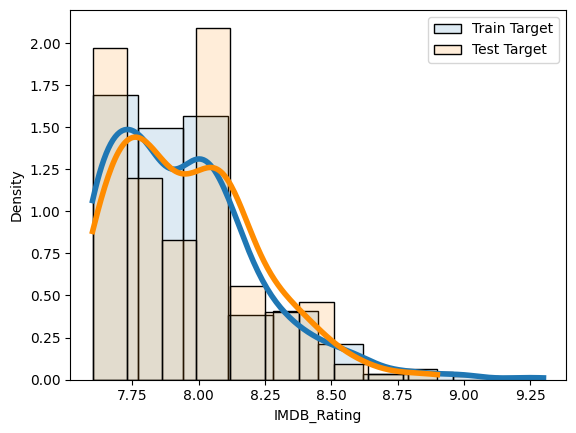

In [ ]:
fold_visualizer(y_train, y_test)

### Работа с пропусками

**Для числовых признаков:**
- Среднее/медиана - обычно LR
  - Искажает исходное распределение
- Произвольное число - обычно для деревьев, kNN
  - Еще больше искажает распределение
  - Искажает ковариации с остальными признаками
  - Может создать выбросы
- Число из хвоста распределения (= End of Tail Imputation) - обычно для деревьев
  - Искажает распределение
  - Прячет  выбросы

**Для категориальных признаков:**
- Самая частотная категория
  - Может привести к чрезмерной представленности категории
- Добавление отдельной категории “missing”
  - Может привести к появлению шума в данных

**Общее:**
- Добавление индикатора отсутствия
  - Увеличивает размерность
- Удаление строк с пропусками
  - Уменьшает выборку данных
  - Может исказить данные
- Random Sample Imputation - случайно сэмплируем объект и заменяем
  - Случайный…
  - Может нарушить взаимосвязь в данных
- Предсказание ML-моделями


In [ ]:
X_train['Certificate']

,Certificate
335,UA
270,U
705,G
983,UA
731,UA
...,...
235,PG-13
980,A
596,U
607,R


In [ ]:
from sklearn.impute import SimpleImputer

imp_cat = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
X_train[['Certificate']] = imp_cat.fit_transform(X_train[['Certificate']])

In [ ]:
X_train[['Certificate']].head(10)

,Certificate
335,UA
270,U
705,G
983,UA
731,UA
965,A
125,Passed
174,U
58,U
443,Unknown


In [ ]:
X_test[['Certificate']] = imp_cat.transform(X_test[['Certificate']])

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train[['Gross', 'Meta_score', 'Released_Year']] = imp_mean.fit_transform(X_train[['Gross', 'Meta_score', 'Released_Year']])
X_test[['Gross', 'Meta_score', 'Released_Year']] = imp_mean.transform(X_test[['Gross', 'Meta_score', 'Released_Year']])

### Масштабирование

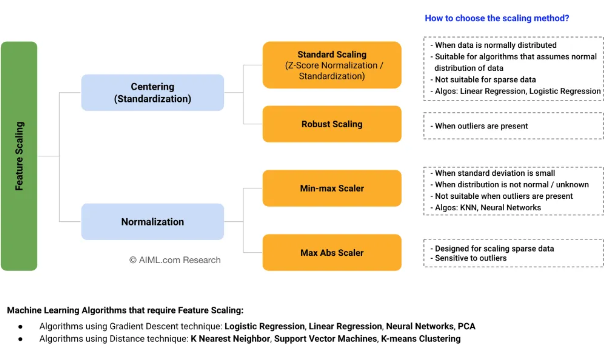

Стандартизация наборов данных является общим требованием для многих моделей машинного обучения.
- На практике мы часто игнорируем форму распределения и просто преобразуем данные, чтобы центрировать их, удаляя среднее значение каждого признака, а затем масштабируем его, разделив признаки на их стандартное отклонение - `StandardScaler`.
- Есть вариант масштабирования в заданный диапазон - `MinMaxScaler`. Если range = (0, 1) - часто называют нормализацией.
- Или масштабирование по максимальному значению к максимуму = 1 без центрирования (для центрированных около нуля или разреженных данных) - `MaxAbsScaler`.
- В случае наличия выбросов - `RobustScaler`.

In [ ]:
num_cols = X_train.select_dtypes(exclude='object')
num_cols.head()

,Released_Year,Runtime,Meta_score,No_of_Votes,Gross,Action,Adventure,Animation,Biography,Comedy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
335,2013.0,144,77.838608,51069,1079369.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
270,1984.0,117,86.000000,150924,495770.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
705,1962.0,178,75.000000,52141,39100000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
983,1979.0,92,65.000000,93878,22490039.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
731,2014.0,126,69.000000,344312,124872350.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train[num_cols.columns] = scaler.fit_transform(X_train[num_cols.columns])
X_test[num_cols.columns] = scaler.transform(X_test[num_cols.columns])

In [ ]:
X_train.head(2)

,Released_Year,Certificate,Runtime,Meta_score,Director,No_of_Votes,Gross,cast,all_text,Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
335,0.932002,UA,0.723547,0.000000,Neeraj Pandey,-0.686914,-0.683586,Akshay Kumar Anupam Kher Manoj Bajpayee Jimmy ...,Special Chabbis A gang of con-men rob prominen...,-0.510396,...,-0.189504,-0.177868,-0.103835,-0.318311,-0.37854,-0.292205,-0.110208,2.625783,-0.234206,-0.156813
270,-0.306088,U,-0.222770,0.695768,Hayao Miyazaki,-0.387705,-0.689223,Sumi Shimamoto Mahito Tsujimura Hisako Kyôda G...,Kaze no tani no Naushika Warrior and pacifist ...,-0.510396,...,-0.189504,-0.177868,-0.103835,-0.318311,-0.37854,-0.292205,-0.110208,-0.380839,-0.234206,-0.156813


### Соберем все вместе

In [ ]:
%%capture
!pip install category_encoders

In [ ]:
from category_encoders.leave_one_out import LeaveOneOutEncoder

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=77)
X_train.head()

,Released_Year,Certificate,Runtime,Meta_score,Director,No_of_Votes,Gross,cast,all_text,Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
335,2013.0,UA,144,NaN,Neeraj Pandey,51069,1079369.0,Akshay Kumar Anupam Kher Manoj Bajpayee Jimmy ...,Special Chabbis A gang of con-men rob prominen...,0,...,0,0,0,0,0,0,0,1,0,0
270,1984.0,U,117,86.0,Hayao Miyazaki,150924,495770.0,Sumi Shimamoto Mahito Tsujimura Hisako Kyôda G...,Kaze no tani no Naushika Warrior and pacifist ...,0,...,0,0,0,0,0,0,0,0,0,0
705,1962.0,G,178,75.0,Ken Annakin,52141,39100000.0,Andrew Marton Gerd Oswald Bernhard Wicki Darry...,"The Longest Day The events of D-Day, told on a...",1,...,0,0,0,0,0,0,0,0,0,0
983,1979.0,UA,92,65.0,Walter Hill,93878,22490039.0,Michael Beck James Remar Dorsey Wright Brian T...,"The Warriors In the near future, a charismatic...",1,...,0,0,0,0,0,0,0,1,0,0
731,2014.0,UA,126,69.0,Josh Boone,344312,124872350.0,Shailene Woodley Ansel Elgort Nat Wolff Laura ...,The Fault in Our Stars Two teenage cancer pati...,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_train.columns

Index(['Released_Year', 'Certificate', 'Runtime', 'Meta_score', 'Director',
       'No_of_Votes', 'Gross', 'cast', 'all_text', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
num_cols = X_train.select_dtypes(exclude='object').columns
num_cols

Index(['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [ ]:
X_train.select_dtypes(include='object').columns

Index(['Certificate', 'Director', 'cast', 'all_text'], dtype='object')

**Обработка текста**



В объемном корпусе некоторые слова будут присутствовать в большом количестве документов (текстов), а значит, они несут очень мало значимой информации о фактическом содержании документа.

Для решения этой проблемы можно использовать Tf-Idf подход

Цель использования tf-idf состоит в том, чтобы уменьшить влияние токенов, которые очень часто встречаются в данном корпусе и, следовательно, эмпирически менее информативны, чем признаки, которые встречаются малой части корпуса



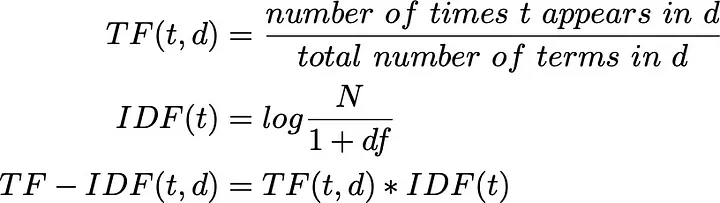

Можно заметить, что **term-frequency** изменяется в диапазоне [0, 1]

тогда как без логарифмирования **inverse document-frequency** - [1, N + 1]

In [ ]:
categorical_preprocessing = Pipeline([
    ('Imputation', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('TargetEncoding', LeaveOneOutEncoder()),
])

numeric_preprocessing = Pipeline([
     ('Imputation', SimpleImputer(strategy='mean')),
     ('Scaling', StandardScaler())
])

text_preprocessing = Pipeline([
     ('tf-idf', TfidfVectorizer())
])

preprocessing = make_column_transformer(
     (text_preprocessing, 'all_text'),
     (numeric_preprocessing, num_cols),
     (categorical_preprocessing, ['Certificate', 'Director']),
)

In [ ]:
pipeline = Pipeline([
      ('Preprocessing', preprocessing),
      ("model", LinearRegression())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('tf-idf',
                                                                   TfidfVectorizer())]),
                                                  'all_text'),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy...
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   LeaveOneOutEncoder())]),
                                                  ['Certificate',
                                                   'Director'])])),
                ('model', LinearRegression())])

In [ ]:
pipeline.score(X_test, y_test)

0.3699616174833579

### Полиномизация

Часто бывает полезно усложнить модель, заставив ее учитывать нелинейные особенности входных данных. Простой и распространенный метод для этого — полиномиальные функции.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures



```
Generate a new feature matrix consisting of all polynomial combinations of
the features with degree less than or equal to the specified degree.

For example, if an input sample is two dimensional and of the form [a, b],
the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
```



In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [ ]:
n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test)

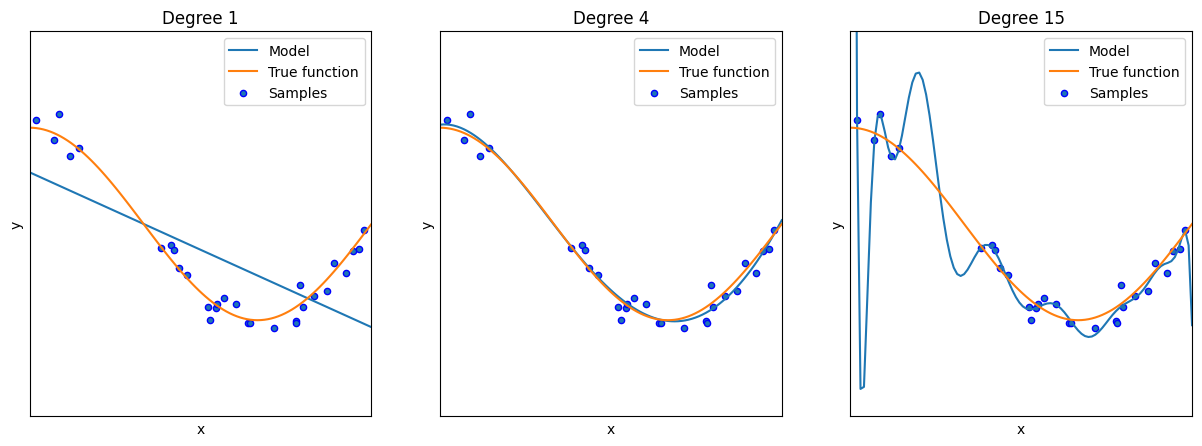

In [ ]:
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, y_test, label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degree}")

plt.show()

### Биннинг

Дискретизация вещественных признаков

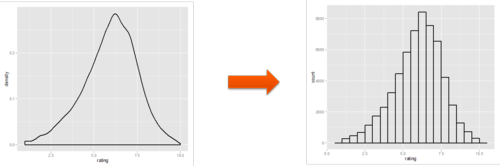

#### FunctionTransformer + pd.cut

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
age_data = np.random.randint(18, 80, size=15)
age_data

array([59, 53, 18, 49, 23, 48, 18, 67, 68, 54, 52, 66, 47, 21, 52])

In [ ]:
bins = [18, 23, 30, 45, 59, np.inf]
labels = ['student', 'young_specialist', 'specialist', 'adult', 'senior citizen']

In [ ]:
transformer = FunctionTransformer(
  func=pd.cut,
  kw_args={'bins': bins, 'labels': labels, 'retbins': False},
)
transformer.fit_transform(age_data)

['adult', 'adult', NaN, 'adult', 'student', ..., 'adult', 'senior citizen', 'adult', 'student', 'adult']
Length: 15
Categories (5, object): ['student' < 'young_specialist' < 'specialist' < 'adult' < 'senior citizen']

#### KBinsDiscretizer

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
kbins.fit_transform(age_data.reshape(-1, 1))

array([[4.],
       [3.],
       [0.],
       [3.],
       [0.],
       [3.],
       [0.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [2.],
       [0.],
       [3.]])

In [ ]:
kbins.bin_edges_ # границы бинов

array([array([18., 28., 38., 48., 58., 68.])], dtype=object)